## Préambule : Fonction

Avant de traiter le problème, on va donner deux possibilités pour résoudre une équation stationnaire :
* écrire une fonction `dicho(f,a,b,prec)` comme demandé précédemment utilisant la dichotomie. _On fera un test à la fois sur la largeur de l'intervalle et sur la valeur maximale de $f$ sur l'intervalle._
* utiliser une fonction native de `scipy.optimize` : `bisect`

In [36]:
# Bibliothèques scientifiques
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import bisect


#  ---- Fonction implémentant la dichotomie -------------
# Note sur la signature de la fonction:
# callable = fonction
# list[float] = liste (classique) de flottants
# Les annotations qui donnent la signature de la fonction sont purement indicatives, Python ne les vérifie pas.
def dicho(f: callable, a: float, b: float, prec: float) -> list[float]:
    """
    Version demandée :
    Renvoie la racine de f située entre a et b avec une précision prec
    """
    # On vérifie qu'il y a bien au moins une racine (cf. deuxième semestre)
    assert f(a) * f(b) <= 0
    
    # Cas exotique : Cas où la racine est sur les bords
    if f(a) == 0:
        return [a, f(a)]
    elif f(b) == 0:
        return [b, f(b)]
    
    # Méthode de dichotomie
    bg, bd = a, b # (Facultatif) On évite de modifier les arguments. On modifiera bg et bd
    while ((bd-bg) > prec) and (max(f(bd), f(bg)) > prec):
        c = (bg + bd) / 2
        if f(c) == 0: # Racine au milieu
            return [c, f(c)]
        elif f(bg) * f(c) < 0: # Changement de signe à gauche
            bd = c
        else: # Changement de signe à droite
            bg = c
    c = (bg + bd) / 2
    return [c, f(c)]
    

# ---- Fonction native --------
help(bisect)
# Remarque : pas de besoin de donner une précision, celle par défaut suffit : bisect(f,a,b)

#Sur un exemple
def f(x):
    return np.exp(x)-2*x- 1

print(dicho(f, 1, 3, 1e-12))
c = bisect(f, 1, 3)
print(c, f(c))


Help on function bisect in module scipy.optimize.zeros:

bisect(f, a, b, args=(), xtol=2e-12, rtol=8.881784197001252e-16, maxiter=100, full_output=False, disp=True)
    Find root of a function within an interval using bisection.
    
    Basic bisection routine to find a zero of the function `f` between the
    arguments `a` and `b`. `f(a)` and `f(b)` cannot have the same signs.
    Slow but sure.
    
    Parameters
    ----------
    f : function
        Python function returning a number.  `f` must be continuous, and
        f(a) and f(b) must have opposite signs.
    a : scalar
        One end of the bracketing interval [a,b].
    b : scalar
        The other end of the bracketing interval [a,b].
    xtol : number, optional
        The computed root ``x0`` will satisfy ``np.allclose(x, x0,
        atol=xtol, rtol=rtol)``, where ``x`` is the exact root. The
        parameter must be nonnegative.
    rtol : number, optional
        The computed root ``x0`` will satisfy ``np.allclose(

---
La page ci-présente existe en version notebook téléchargeable grâce au bouton ![Bouton](./images/bouton_tl.png) (choisir le format `.ipynb`). On rappelle qu'l faut ensuite l'enregistrer dans un répertoire adéquat sur votre ordinateur (`capa_num` par exemple dans votre répertoire personnel) puis lancer Jupyter Notebook depuis Anaconda pour accéder au notebook, le modifier et exécutez les cellules de code adéquates.

# Etude du redressement monoalternance
Nous allons utiliser la méthode précédente pour chercher le point de fonctionnement du [circuit précédent](pos_pb_eq) à chaque instant $t$ en supposant que $E$ varie: $E(t) = E_0 \cos (2 \pi f t)$ avec $E_0 = 2 \rm{V}$ et $f = 50 \rm{Hz}$.

On suppose que les caractéristiques des dipôles restent valables en régime variable de sorte qu'à un instant $t$, la tension $u_D$ est donnée par la solution de l'équation:

$$
  f(u) = \frac{E(t)-u}{R} - I_s\left(\exp \left(\frac{u}{V_T}\right) - 1\right)
$$
avec $I_s = 95 \rm{\mu A}$ et $V_D = 30 \rm{mV}$ et $t$ un instant connu.

On va donc devoir réaliser une recherche de racine un grand nombre de fois. Il est donc préférable de mettre la série d'instructions pour déterminer la racine de $f$ dans une fonction.

## Fonction pour résoudre

> __Exercice 1:__  
> 1. Importer les bibliothèques `numpy` et `matplotlib.pyplot`
> 1. Définir une fonction `Esource(t)` qui renvoie la valeur de $E(t)$ pour un instant $t$ donné en argument et une fonction `f_test(u)` qui renvoie la valeur de $f$ pour une tension $u$ donnée en argument de la fonction (elle utilisera une valeur `E` de tension pour la source comme une variable globale, les autres grandeurs Is, VT... peuvent être définie dans la fonction `f_test`, cf remarque par la suite).
> 1. _(Si ça na pas été fait précédemment)_ Tracer la fonction $f$ entre $[-1,1]$ pour $t = 0$ (donc $E = 2\rm{V}$) et vérifier graphiquement qu'il n'y bien qu'une seule racine dans l'intervalle (_Note: On peut démontrer que la fonction est strictement décroissante, on a donc bien unicité de la racine quand elle existe._)

__Remarque__:  
Le code ressemblera donc à ceci:

```{code-block}
def Esource(t):
  # corps du code si necessaire
  return ....

def f_test(u):
  # corps du code si necessaire
  # La tension E sera notée E sans être définie par exemple :
  R = 100
  i = (E - u) / R
  return i

# Pour utiliser f_test:
E = 1  # Nécessaire
f_test(u)
# On pourra redéfinir E avant chaque appel de f_test si nécessaire
```

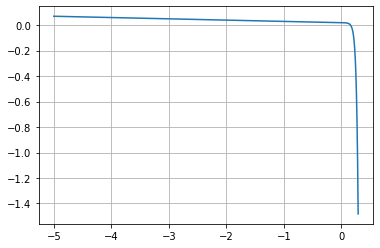

In [37]:
E0 = 2
f = 50
def Esource(t):  # Tension en fonction du temps
    return E0 * np.cos(2 * np.pi * f * t)

def f_test(u):  # Fonction de test
    R = 100
    Is = 95e-6
    VT = 30e-3
    i = (E - u) / R - Is * (np.exp(u / VT) - 1)
    return i

E = 2
u = np.arange(-5, 0.3, 0.01)

fg, ax = plt.subplots()
ax.plot(u, f_test(u))
ax.grid()
plt.show()

> __Exercice 2:__  
> 1. Ecrire une fonction `dicho(f,a0,b0,prec)` qui va chercher la racine de la fonction `f` dans l'intervalle initiale $[a0,b0]$ avec une précision `prec` par la méthode de dichotomie.
> 2. Tester la fonction avec `f_test` et $E = 2\rm{V}$ et vérifier la cohérence avec ce qu'on obtient graphiquement.

* L'argument `f` est la __fonction__ donc `f` ou `f_test`, pas _ce qu'elle renvoie_ (c'est-à-dire `f(0)` ou `f_test(1)`, _on a la même différence entre une fonction et l'image d'une fonction_).
* Par contre, à l'intérieur de `dicho`. Comme `f` est une fonction, on pourra l'appeler en utilisant `f(a)`, `f(1)`...
* Ne pas modifier les valeurs des arguments `a0` et `b0` : il faut les réassigner à deux variables internes à la fonction (_`a` et `b` par exemple_) et modifier ces deux variables dans la boucle.
* Il est conseillé de tester initialement si le produit $f(a0)f(b0)$ est bien négatif et renvoyer `None` sinon. Cela évitera des résultats absurdes si l'on cherche dans un intervalle où il n'y a pas de racine. _Quand vous aurez avancé le cours d'informatique, vous pourrez remplacer ce comportement par une assertion._

In [38]:
# Cf. début pour la définition de dicho. On va utiliser dicho ET bisect.
E = 2
print(dicho(f_test, -5, 5, 1e-12))
c = bisect(f_test, -5, 5)
print(c, f_test(c))


[0.15817101692334745, 2.699160339680873e-13]
0.15817101692277902 6.263982388343692e-13


## Application au redressement monoalternance
> __Exercice 3:__  
> Ecrire une suite d'instruction:
> 1. Définir un vecteur `E_k` qui prendre 1000 valeurs de $E(t)$ aux instants $t_k$ équirépartis sur 2 périodes de $E(t)$.
> 2. Dans une boucle, pour chaque valeur de $E_k$, rechercher la tension $u_D$ correspondant et la stocker dans une liste.
> 3. Transformer la liste des tensions `uD` en un vecteur puis obtenir les valeurs d'intensités correspondantes $i(t)$ (pensez aux fonctions vectorialisables pour l'obtenir en une instruction).
> 4. Obtenir les valeurs de la tension $uR$ à chaque instant et tracer $u_R (t)$. Pourquoi parle-t-on de redressement ? monoalternance ?

* Note : Réfléchir au choix de l'intervalle de recherche.

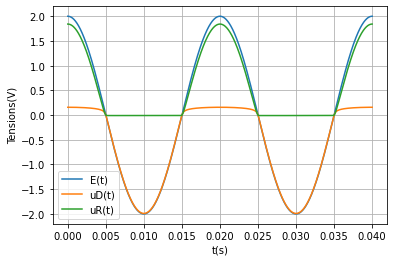

In [48]:
tk = np.linspace(0, 2 / f, 1000)
Ek = Esource(tk)
ud = []
for E in Ek:
    ud.append(bisect(f_test, -5, 5))


fg, ax  = plt.subplots()
ax.set_xlabel("t(s)")
ax.set_ylabel("Tensions(V)")
ax.plot(tk, Ek, label="E(t)")
ax.plot(tk, ud, label="uD(t)")

# On va aussi tracer uR qui correspond au vrai redressement monoalternance
# On a uR = E - u

ud = np.array(ud) #Transformation en vecteur
ur = Ek - ud
ax.plot(tk, ur, label="uR(t)")

ax.grid()
ax.legend()
plt.show()